selalu jalankan ini

kode ini untuk menclone folder yolo5 dari github

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-334-g100a423b Python-3.10.12 torch-2.3.0+cu121 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.3/107.7 GB disk)


jika sudah pernah training upload file best.pt dan last.pt ke /content/yolov5/runs/train/exp/weights jika folder belum ada buat

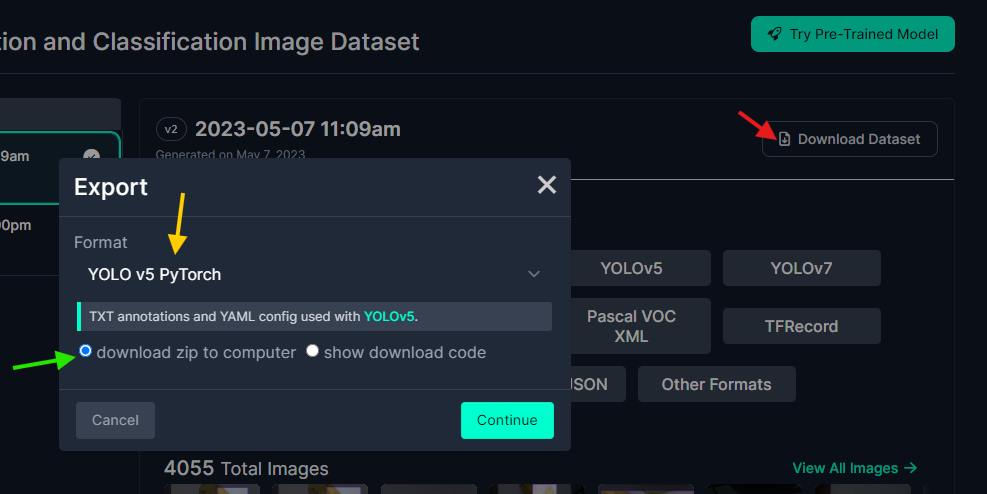

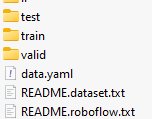

data set dari roboflow, extrak file zip yang sudah di download, masukan folder test, train dan valid ke 1 folder, pada drive ini saya masukan ke "fruit_uas" dan jadikan zip -> fruit_uas.zip, lalu upload pada google drive

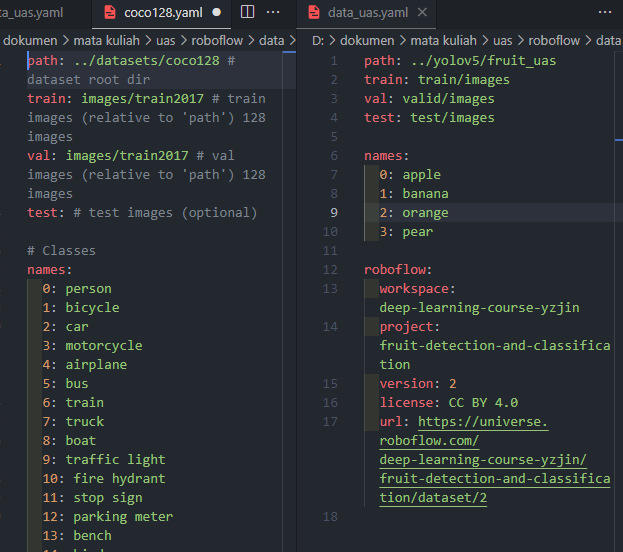



data.yaml berisi path untuk training data, pada drive ini saya namakan data_uas,yaml

upload file data_uas.yaml pada /content/yolov5/data/

samakan format file data_uas.yaml dengan file coco128.yaml yang berada di /content/yolov5/data/

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


kloning file fruit_uas.zip ke colab, lalu si unzip

In [ ]:
!scp '/content/gdrive/MyDrive/uas pcd/fruit_uas.zip' '/content/fruit_uas.zip' #'/content/gdrive/MyDrive/uas pcd/fruit_uas.zip' lokasi pada drive dan di klone ke -> '/content/fruit_uas.zip'
!unzip '/content/fruit_uas.zip' #kode untuk unzip
#hasil unzip akan masuk ke folder yolo5

Streaming output truncated to the last 5000 lines.
  inflating: fruit_uas/train/images/2176_jpg.rf.d0ecea8c36b3975ff9281277243451e9.jpg  
  inflating: fruit_uas/train/images/2176_jpg.rf.de029865bcca5d1eddfcac83ca7cd6d7.jpg  
  inflating: fruit_uas/train/images/2177_jpg.rf.2468470c9ce440b0f091f2f2a1336d0b.jpg  
  inflating: fruit_uas/train/images/2177_jpg.rf.b21a3795c426483a2845a8a0663b66e6.jpg  
  inflating: fruit_uas/train/images/2177_jpg.rf.fe8a0cb2d355b1583d8d1a6cbae8a37c.jpg  
  inflating: fruit_uas/train/images/2179_jpg.rf.1b42c932eeaf51d04ec9c49d5614bcc3.jpg  
  inflating: fruit_uas/train/images/2179_jpg.rf.7721ecf977d74cad2648d07521d7f3db.jpg  
  inflating: fruit_uas/train/images/2179_jpg.rf.9a58ed969794dddf1104d6f8cc8e0b97.jpg  
  inflating: fruit_uas/train/images/2180_jpg.rf.cf2865b8a93e9cf14ee284a1a14b08f9.jpg  
  inflating: fruit_uas/train/images/2180_jpg.rf.d6bc266c836c52dae0d137dccf6b64de.jpg  
  inflating: fruit_uas/train/images/2180_jpg.rf.d88b84d08a3485ffb3b2192e25fa68e

kode dibawah untuk training gambar, ganti COCO128.yaml menjadi /content/yolov5/data/data_uas.yaml

In [ ]:
!python train.py --img 640 --batch 16 --epochs 10 --data /content/yolov5/data/data_uas.yaml --weights yolov5s.pt --cache
# !python train.py --img 640 --batch 16 --epochs 10 --data COCO128.yaml --weights yolov5s.pt --cache

deteksi, upload gambar yang akan di deteksi, ganti kode --source data/images menjadi --source /content/coba2.jpg

detect: weights=['yolov5s.pt'], source=/content/coba.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-334-g100a423b Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/coba.jpg: 384x640 11 apples, 11 oranges, 322.3ms
Speed: 6.6ms pre-process, 322.3ms inference, 3.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


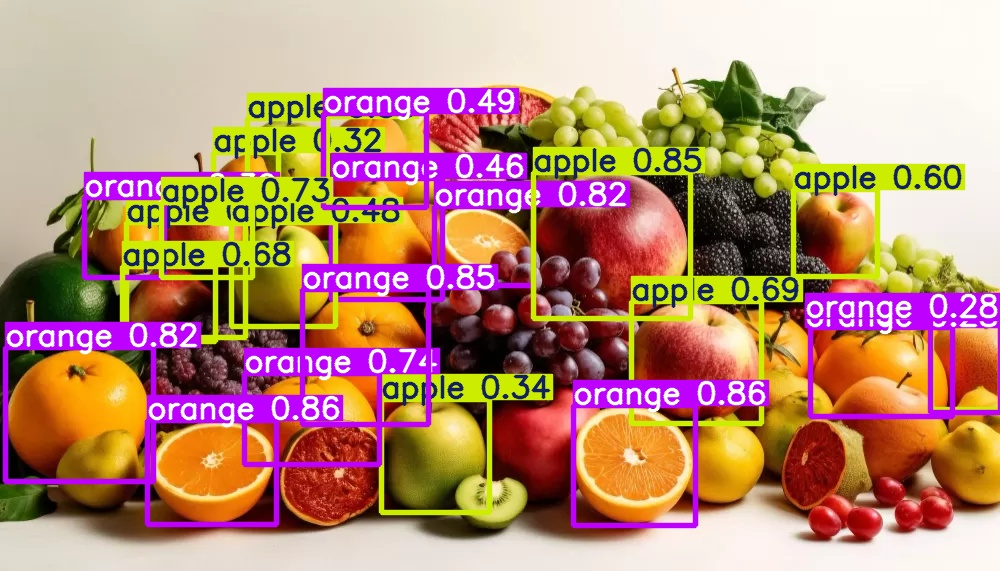

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source /content/coba.jpg
# !python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp2/coba.jpg', width=600)